A short introduction to fast SPT modeling
-----------------------------------------

This notebook presents a short introduction to the modeling of fast single particle tracking datasets. 
The methodology, together with examples of biological relevance, can be found at:

> Hansen, Anders S., Iryna Pustova, Claudia Cattoglio, Robert Tjian, and Xavier Darzacq. “CTCF and Cohesin Regulate Chromatin Loop Stability with Distinct Dynamics.” bioRxiv, 2016, 093476.

This package includes several sample datasets, that will be used by this notebook. Make sure that they can be found by Python.

## 1. Loading of a dataset

To help us with basic and repeated tasks such as dataset loading, we created a small library, `fastSPT_tools` that contain several helper functions that we will use all across this tutorial. We thus need to import it by typing `import fastSPT_tools`.

One of the functions list the available datasets: `list_sample_datasets(path)`. Let's first see what datasets we can get. Then, we will use the `load_dataset(path, dataset_id, cells)` function to load the relevant dataset. This latter function can either load one single cell or a series of cells (identified by their id).

In [13]:
import sys
from tqdm.autonotebook import tqdm
sys.version

#sys.path.append(r'C:\Users\andre\Documents\Spot-On-cli')

'3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]'

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import loadmat
import lmfit

#sys.path.append(r'C:\Users\andre\Documents\Spot-On-cli')

import fastspt as fs
from fastspt import fit, tools, plot, readers, matimport, tracklen
%load_ext autoreload

%autoreload 2

print("Using fastspt version {}".format(fs.__version__))

import logging
logger = logging.getLogger(__name__)
logging.getLogger('matplotlib').setLevel(logging.WARNING)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using fastspt version 16.4


In [15]:
import os
os.getcwd()

'C:\\Users\\andre\\Documents\\Spot-On-cli'

In [17]:
from glob import glob

In [18]:
folder = r"Z:/Andrey/data/2019/0510-e-coli-PBP2-PAmCh/S1-OD_0.1/"
#folder = r"Z:\Andrey\data\2019\0403-RAMM-e-coli-pbp2-PAmCherry-TLK130\100x_1.49NA\0403_OD0.1"
data_paths = glob(folder + "/*/*Tracks.xml")

In [19]:
data_paths

['Z:/Andrey/data/2019/0510-e-coli-PBP2-PAmCh/S1-OD_0.1\\01_60ms_561-405_temp_32_1\\01_60ms_561-405_temp_32_1_MMStack_Pos0_Tracks.xml',
 'Z:/Andrey/data/2019/0510-e-coli-PBP2-PAmCh/S1-OD_0.1\\02_60ms_561-405_temp_32_1\\02_60ms_561-405_temp_32_1_MMStack_Pos0_Tracks.xml',
 'Z:/Andrey/data/2019/0510-e-coli-PBP2-PAmCh/S1-OD_0.1\\02_60ms_561-405_temp_32_2\\02_60ms_561-405_temp_32_2_MMStack_Pos0_Tracks.xml',
 'Z:/Andrey/data/2019/0510-e-coli-PBP2-PAmCh/S1-OD_0.1\\03_60ms_561-405_temp_31_1\\03_60ms_561-405_temp_31_1_MMStack_Pos0_Tracks.xml',
 'Z:/Andrey/data/2019/0510-e-coli-PBP2-PAmCh/S1-OD_0.1\\04_60ms_561-405_temp_31_1\\04_60ms_561-405_temp_31_1_MMStack_Pos0_Tracks.xml',
 'Z:/Andrey/data/2019/0510-e-coli-PBP2-PAmCh/S1-OD_0.1\\05_60ms_561-405_temp_31_3\\05_60ms_561-405_temp_31_3_MMStack_Pos0_Tracks.xml',
 'Z:/Andrey/data/2019/0510-e-coli-PBP2-PAmCh/S1-OD_0.1\\06_60ms_561-405_temp_31_1\\06_60ms_561-405_temp_31_1_MMStack_Pos0_Tracks.xml',
 'Z:/Andrey/data/2019/0510-e-coli-PBP2-PAmCh/S1-OD_0.1\

In [22]:
# Independent experiments
reps = []
data_paths = data_paths[:]
for xml_path in data_paths:
    print(xml_path)
    reps.append(readers.read_trackmate_xml(xml_path))

Z:/Andrey/data/2019/0510-e-coli-PBP2-PAmCh/S1-OD_0.1\01_60ms_561-405_temp_32_1\01_60ms_561-405_temp_32_1_MMStack_Pos0_Tracks.xml
Z:/Andrey/data/2019/0510-e-coli-PBP2-PAmCh/S1-OD_0.1\02_60ms_561-405_temp_32_1\02_60ms_561-405_temp_32_1_MMStack_Pos0_Tracks.xml
Z:/Andrey/data/2019/0510-e-coli-PBP2-PAmCh/S1-OD_0.1\02_60ms_561-405_temp_32_2\02_60ms_561-405_temp_32_2_MMStack_Pos0_Tracks.xml
Z:/Andrey/data/2019/0510-e-coli-PBP2-PAmCh/S1-OD_0.1\03_60ms_561-405_temp_31_1\03_60ms_561-405_temp_31_1_MMStack_Pos0_Tracks.xml
Z:/Andrey/data/2019/0510-e-coli-PBP2-PAmCh/S1-OD_0.1\04_60ms_561-405_temp_31_1\04_60ms_561-405_temp_31_1_MMStack_Pos0_Tracks.xml
Z:/Andrey/data/2019/0510-e-coli-PBP2-PAmCh/S1-OD_0.1\05_60ms_561-405_temp_31_3\05_60ms_561-405_temp_31_3_MMStack_Pos0_Tracks.xml
Z:/Andrey/data/2019/0510-e-coli-PBP2-PAmCh/S1-OD_0.1\06_60ms_561-405_temp_31_1\06_60ms_561-405_temp_31_1_MMStack_Pos0_Tracks.xml
Z:/Andrey/data/2019/0510-e-coli-PBP2-PAmCh/S1-OD_0.1\07_60ms_561-405_temp_31_1\07_60ms_561-405_te

In [21]:
# Fuse all datasets
fused = []

for xml_path in data_paths:
    print(xml_path)
    fused = fused + readers.read_trackmate_xml(xml_path)
print('total ' + str(len(fused)) + ' localizations')
reps = [fused]

Z:/Andrey/data/2019/0510-e-coli-PBP2-PAmCh/S1-OD_0.1\01_60ms_561-405_temp_32_1\01_60ms_561-405_temp_32_1_MMStack_Pos0_Tracks.xml
Z:/Andrey/data/2019/0510-e-coli-PBP2-PAmCh/S1-OD_0.1\02_60ms_561-405_temp_32_1\02_60ms_561-405_temp_32_1_MMStack_Pos0_Tracks.xml
Z:/Andrey/data/2019/0510-e-coli-PBP2-PAmCh/S1-OD_0.1\02_60ms_561-405_temp_32_2\02_60ms_561-405_temp_32_2_MMStack_Pos0_Tracks.xml
Z:/Andrey/data/2019/0510-e-coli-PBP2-PAmCh/S1-OD_0.1\03_60ms_561-405_temp_31_1\03_60ms_561-405_temp_31_1_MMStack_Pos0_Tracks.xml
Z:/Andrey/data/2019/0510-e-coli-PBP2-PAmCh/S1-OD_0.1\04_60ms_561-405_temp_31_1\04_60ms_561-405_temp_31_1_MMStack_Pos0_Tracks.xml
Z:/Andrey/data/2019/0510-e-coli-PBP2-PAmCh/S1-OD_0.1\05_60ms_561-405_temp_31_3\05_60ms_561-405_temp_31_3_MMStack_Pos0_Tracks.xml
Z:/Andrey/data/2019/0510-e-coli-PBP2-PAmCh/S1-OD_0.1\06_60ms_561-405_temp_31_1\06_60ms_561-405_temp_31_1_MMStack_Pos0_Tracks.xml
Z:/Andrey/data/2019/0510-e-coli-PBP2-PAmCh/S1-OD_0.1\07_60ms_561-405_temp_31_1\07_60ms_561-405_te

# 2. Track lengths analysis

1309 tracks, 11047 localizations
Fit result: 2476.20 * e^(-x/2.51) + 16.54


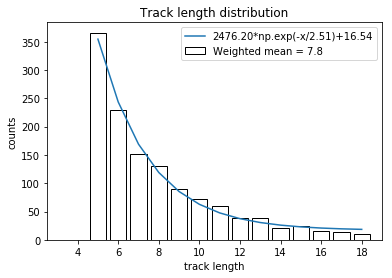

801 tracks, 7085 localizations
Fit result: 792.52 * e^(-x/3.35) + 6.29


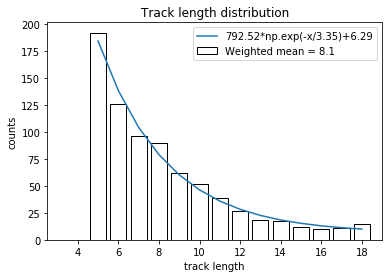

2096 tracks, 17841 localizations
Fit result: 2258.34 * e^(-x/3.26) + 15.24


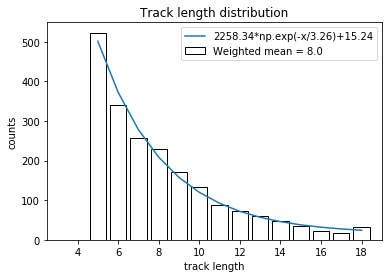

4893 tracks, 42141 localizations
Fit result: 5225.16 * e^(-x/3.25) + 39.73


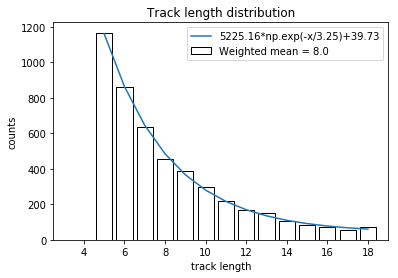

3200 tracks, 27156 localizations
Fit result: 4174.65 * e^(-x/2.96) + 30.72


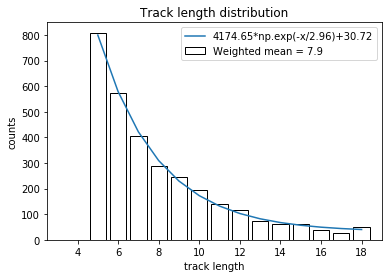

3602 tracks, 31376 localizations
Fit result: 4513.92 * e^(-x/2.94) + 44.94


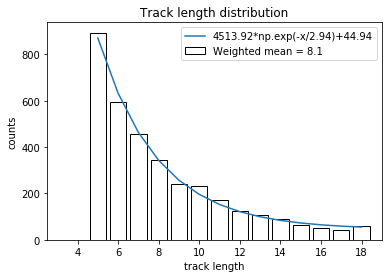

2177 tracks, 18549 localizations
Fit result: 3978.55 * e^(-x/2.52) + 30.41


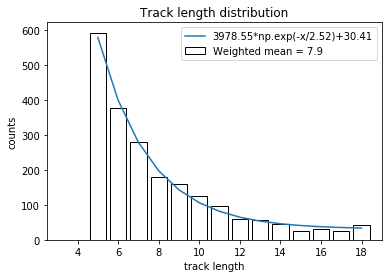

1405 tracks, 7751 localizations
Fit result: 4928.61 * e^(-x/1.86) + 2.19


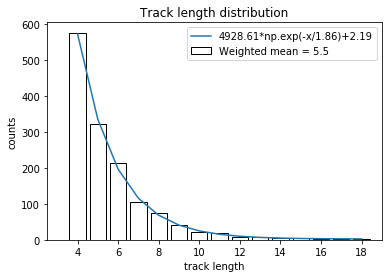

2541 tracks, 18093 localizations
Fit result: 2646.45 * e^(-x/2.91) + 12.79


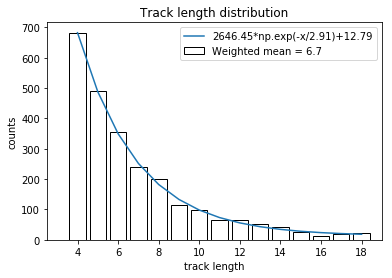

2087 tracks, 13532 localizations
Fit result: 3752.38 * e^(-x/2.30) + 13.30


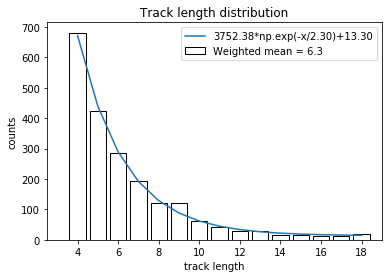

3325 tracks, 22478 localizations
Fit result: 4970.69 * e^(-x/2.45) + 24.89


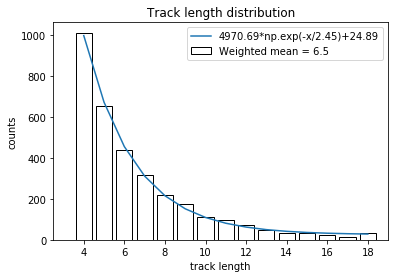

2695 tracks, 18439 localizations
Fit result: 3407.62 * e^(-x/2.65) + 18.02


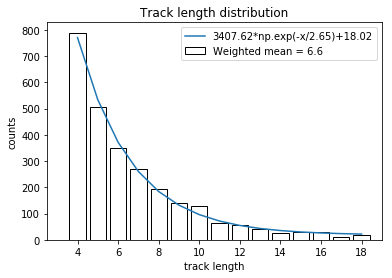

5080 tracks, 32386 localizations
Fit result: 9500.34 * e^(-x/2.28) + 27.81


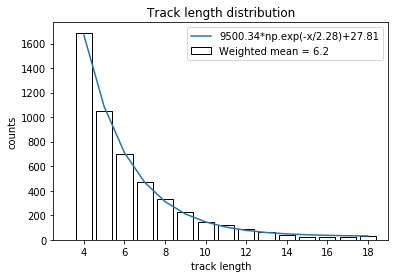

3635 tracks, 22772 localizations
Fit result: 6766.64 * e^(-x/2.30) + 16.48


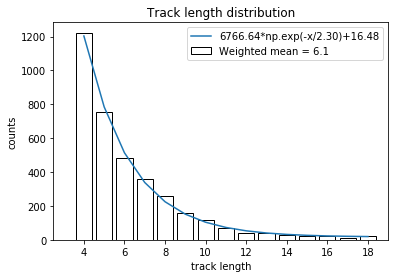

2770 tracks, 17363 localizations
Fit result: 5818.39 * e^(-x/2.17) + 17.22


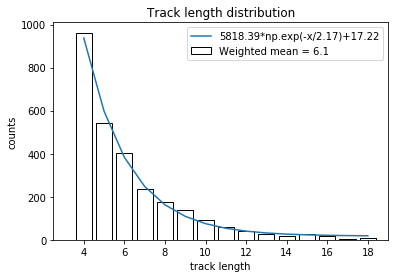

In [23]:
for rep in reps:
    tracklen.get_track_lengths_dist(rep, plot=True)

## 3. Fitting of the jump lengths distribution to the model (2 states)


Number of frames: 1000.0, number of localizations: 11047
Computation of jump lengths performed in 1.28s
Fitting 2 states
Improved fit on iteration 1
Improved error is 3.766446339478255e-06
Name        Value      Min      Max   Stderr
D_bound  8.327e-18        0    0.005     None
D_free    0.05747     0.02      0.1     None
F_bound    0.2044        0        1     None
sigma     0.03021    0.005      0.1     None
None


C:\Users\andre\Documents\Spot-On-cli\fastspt\fit.py:662: RuntimeWarning: invalid value encountered in true_divide
  norm_y[i,:] = y[i,:]/y[i,:].sum()


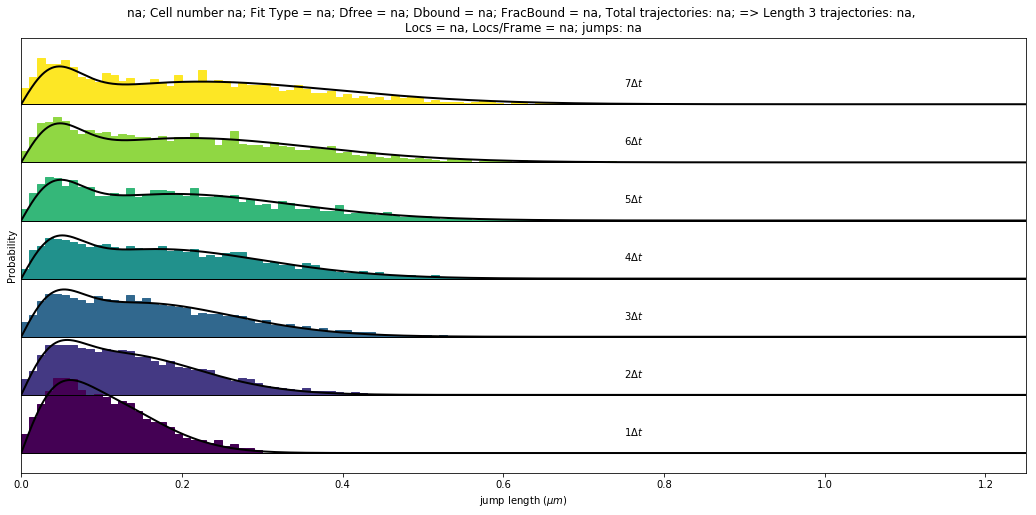

Number of frames: 1000.0, number of localizations: 7085
Computation of jump lengths performed in 1.16s
Fitting 2 states
Improved fit on iteration 1
Improved error is 5.236523590955737e-06
Name        Value      Min      Max   Stderr
D_bound  3.553e-17        0    0.005     None
D_free    0.05566     0.02      0.1     None
F_bound    0.2193        0        1     None
sigma     0.02776    0.005      0.1     None
None


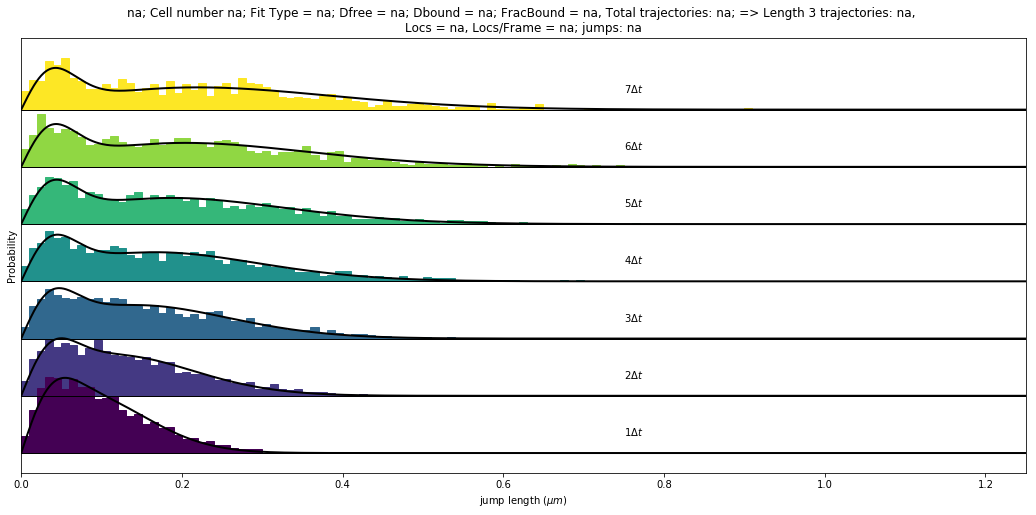

Number of frames: 1000.0, number of localizations: 17841
Computation of jump lengths performed in 1.43s
Fitting 2 states
Improved fit on iteration 1
Improved error is 2.4838164452830798e-06
Name        Value      Min      Max   Stderr
D_bound  0.001477        0    0.005 0.0001892
D_free    0.05144     0.02      0.1 0.000527
F_bound    0.1793        0        1 0.003729
sigma     0.03212    0.005      0.1 0.0006102
None


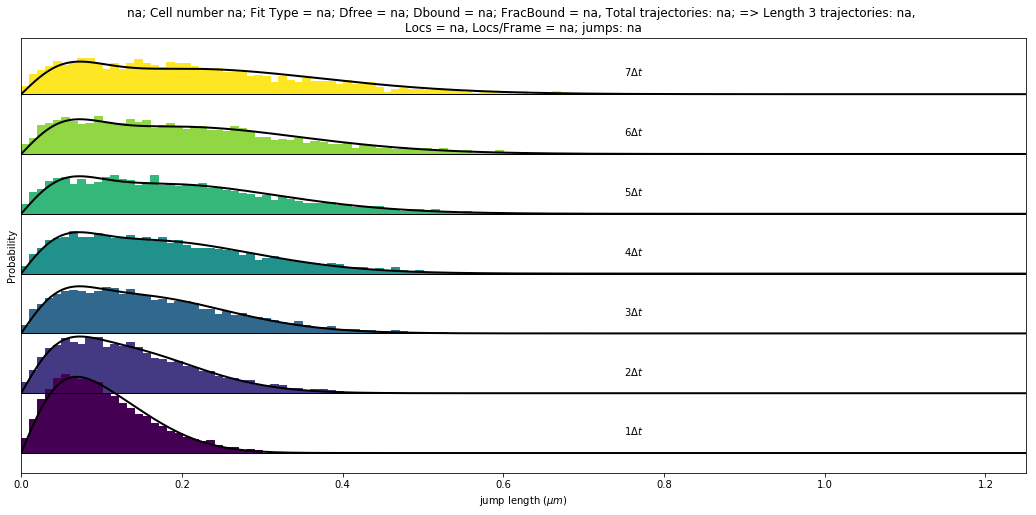

Number of frames: 1000.0, number of localizations: 42141
Computation of jump lengths performed in 2.33s
Fitting 2 states
Improved fit on iteration 1
Improved error is 1.6025310253362438e-06
Name        Value      Min      Max   Stderr
D_bound  0.0001208        0    0.005 0.0001521
D_free    0.05223     0.02      0.1 0.0004191
F_bound    0.1486        0        1  0.00265
sigma     0.03521    0.005      0.1 0.0005208
None


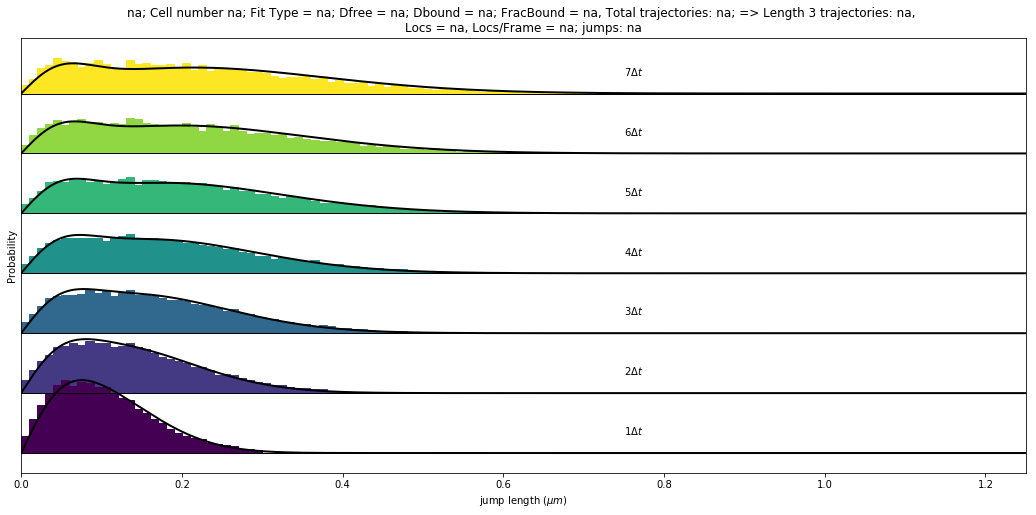

Number of frames: 1000.0, number of localizations: 27156
Computation of jump lengths performed in 1.68s
Fitting 2 states
Improved fit on iteration 1
Improved error is 2.0353723918599497e-06
Name        Value      Min      Max   Stderr
D_bound  0.002597        0    0.005     None
D_free    0.05638     0.02      0.1     None
F_bound    0.1797        0        1     None
sigma     0.03696    0.005      0.1     None
None


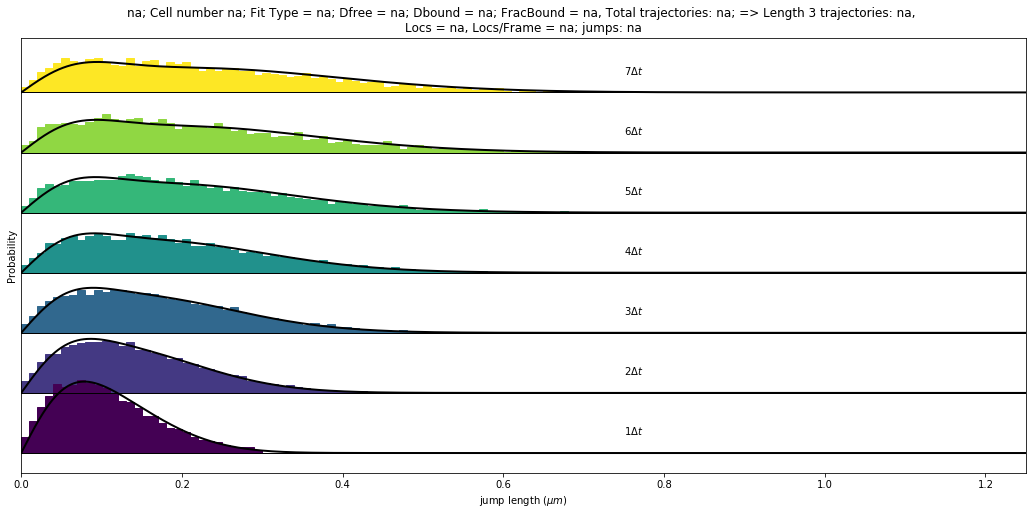

Number of frames: 1000.0, number of localizations: 31376
Computation of jump lengths performed in 1.95s
Fitting 2 states
Improved fit on iteration 1
Improved error is 1.6678639056172094e-06
Name        Value      Min      Max   Stderr
D_bound  0.000827        0    0.005 0.0001264
D_free    0.05259     0.02      0.1 0.0004361
F_bound    0.2083        0        1 0.002865
sigma      0.0335    0.005      0.1 0.0004437
None


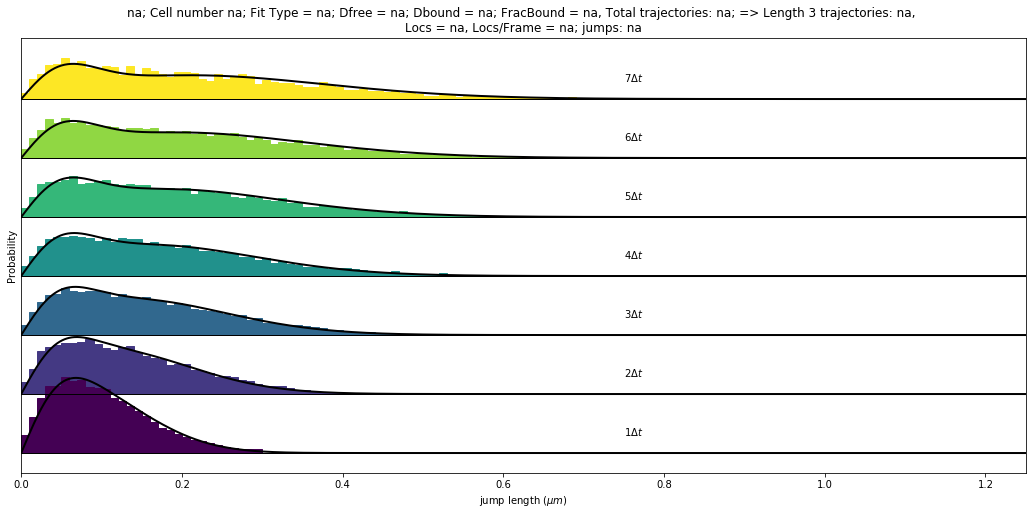

Number of frames: 1000.0, number of localizations: 18549
Computation of jump lengths performed in 1.50s
Fitting 2 states
Improved fit on iteration 1
Improved error is 2.729407001507036e-06
Name        Value      Min      Max   Stderr
D_bound  4.246e-05        0    0.005 0.000188
D_free    0.05234     0.02      0.1 0.000572
F_bound    0.1785        0        1 0.003672
sigma     0.03706    0.005      0.1 0.0006255
None


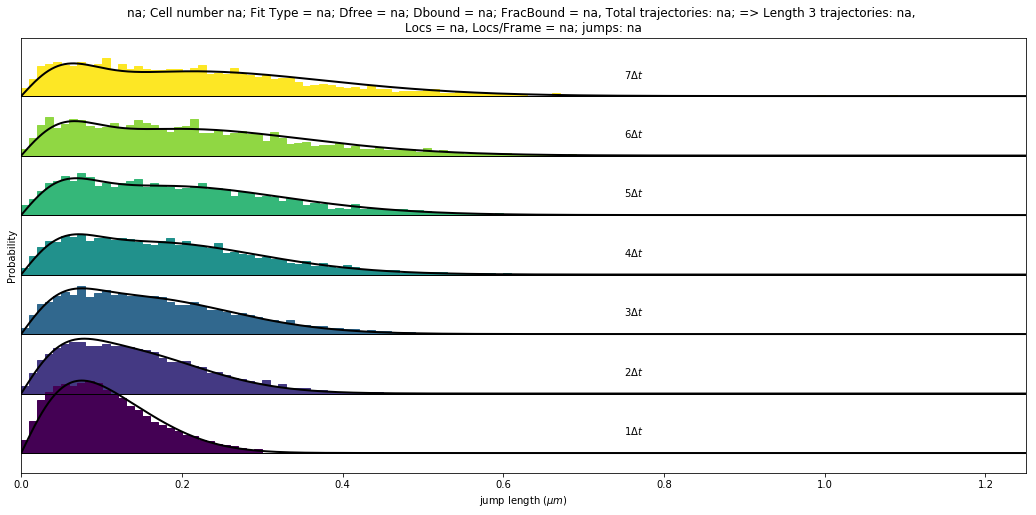

Number of frames: 1000.0, number of localizations: 7751
Computation of jump lengths performed in 1.19s
Fitting 2 states
Improved fit on iteration 1
Improved error is 7.280736196260234e-06
Name        Value      Min      Max   Stderr
D_bound  0.000256        0    0.005 0.0002711
D_free    0.05169     0.02      0.1 0.001057
F_bound     0.264        0        1 0.006968
sigma      0.0397    0.005      0.1 0.0008415
None


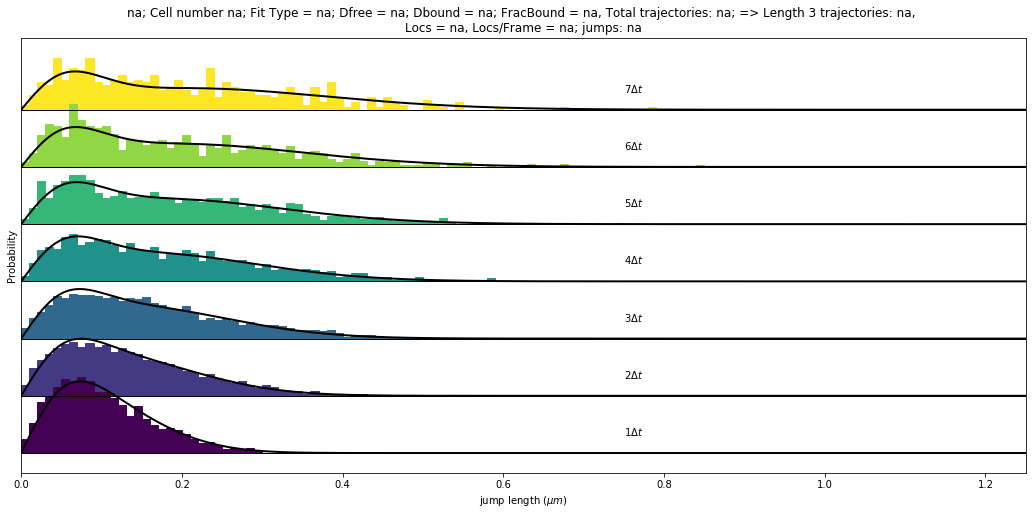

Number of frames: 1000.0, number of localizations: 18093
Computation of jump lengths performed in 1.45s
Fitting 2 states
Improved fit on iteration 1
Improved error is 3.2752048322583253e-06
Name        Value      Min      Max   Stderr
D_bound  2.776e-19        0    0.005     None
D_free    0.04986     0.02      0.1     None
F_bound    0.2108        0        1     None
sigma     0.03106    0.005      0.1     None
None


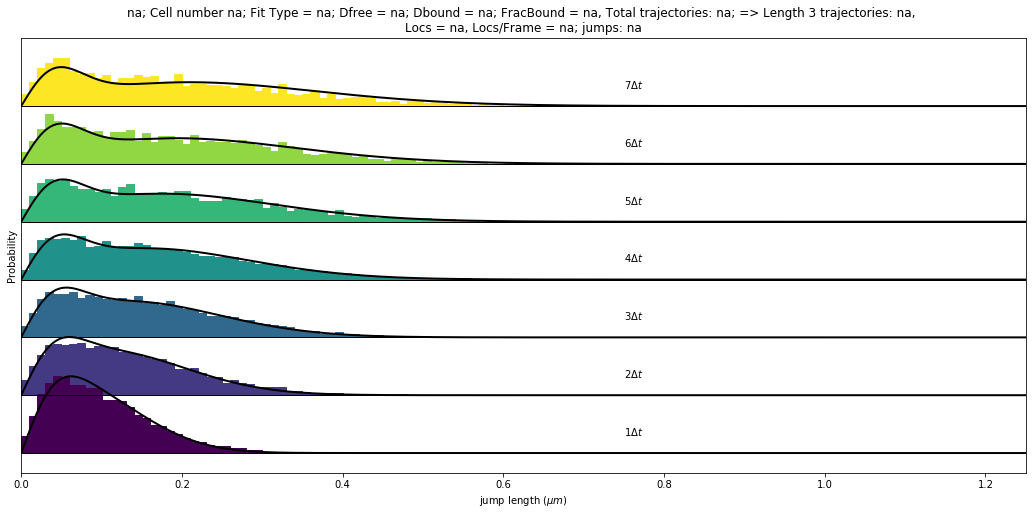

Number of frames: 1000.0, number of localizations: 13532
Computation of jump lengths performed in 1.36s
Fitting 2 states
Improved fit on iteration 1
Improved error is 3.8023692575935155e-06
Name        Value      Min      Max   Stderr
D_bound  2.22e-18        0    0.005     None
D_free    0.04861     0.02      0.1     None
F_bound    0.2332        0        1     None
sigma     0.03308    0.005      0.1     None
None


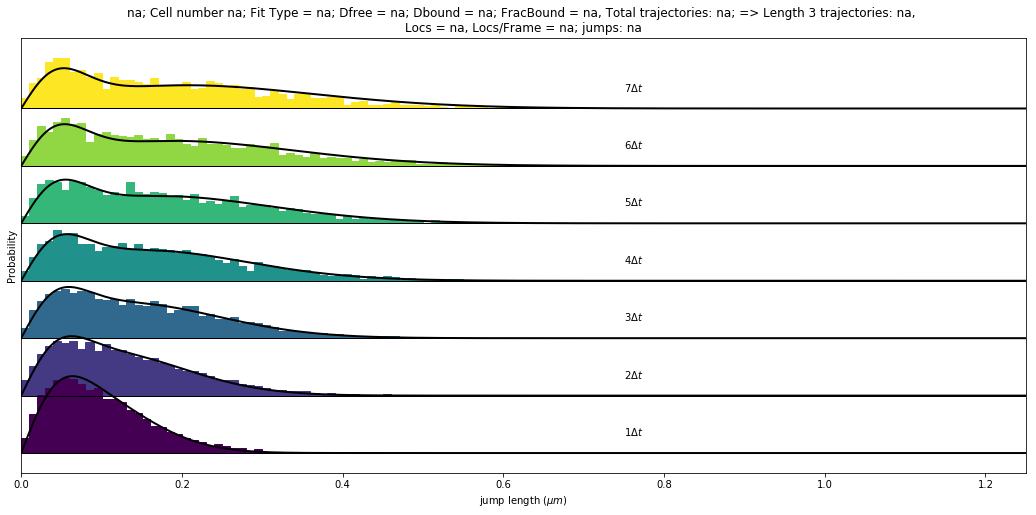

Number of frames: 1000.0, number of localizations: 22478
Computation of jump lengths performed in 1.66s
Fitting 2 states
Improved fit on iteration 1
Improved error is 2.145944088349644e-06
Name        Value      Min      Max   Stderr
D_bound  1.804e-17        0    0.005 0.0001164
D_free    0.05346     0.02      0.1 0.000521
F_bound    0.1996        0        1   0.0033
sigma     0.03783    0.005      0.1 0.0005106
None


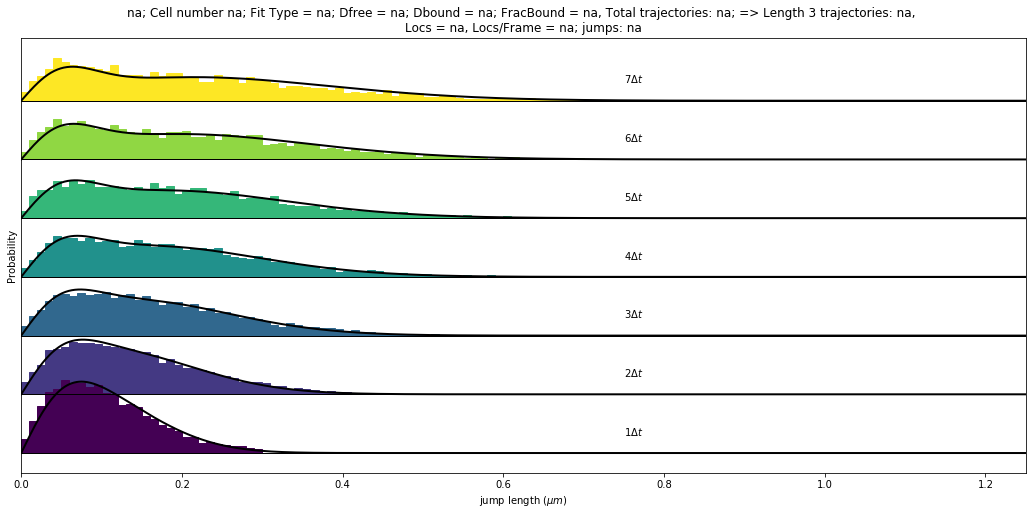

Number of frames: 1000.0, number of localizations: 18439
Computation of jump lengths performed in 1.52s
Fitting 2 states
Improved fit on iteration 1
Improved error is 3.0364738381045076e-06
Name        Value      Min      Max   Stderr
D_bound  0.0003964        0    0.005 0.0001846
D_free    0.05282     0.02      0.1 0.0006084
F_bound    0.1997        0        1 0.003934
sigma     0.03598    0.005      0.1 0.0006231
None


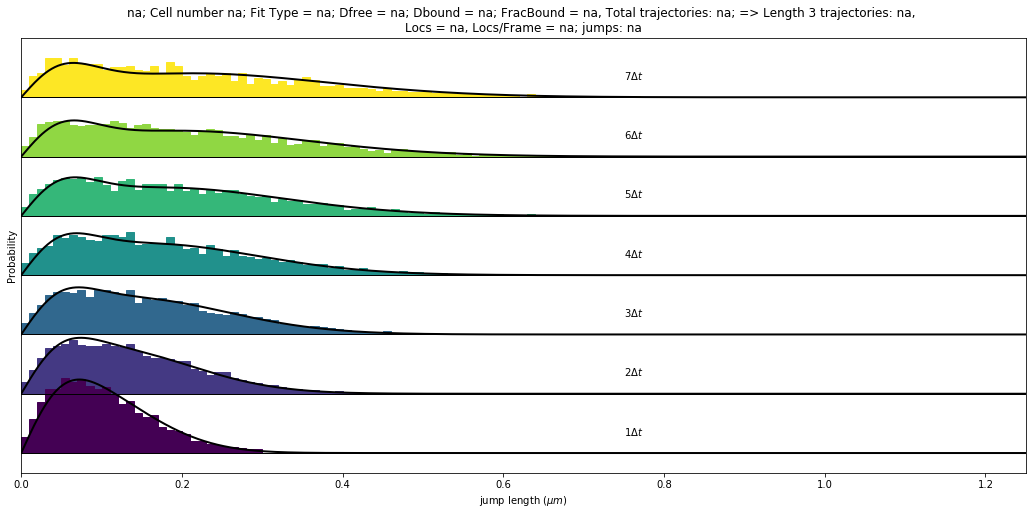

Number of frames: 1000.0, number of localizations: 32386
Computation of jump lengths performed in 1.90s
Fitting 2 states
Improved fit on iteration 1
Improved error is 2.172916777983136e-06
Name        Value      Min      Max   Stderr
D_bound  9.992e-18        0    0.005     None
D_free     0.0546     0.02      0.1     None
F_bound    0.2027        0        1     None
sigma     0.03983    0.005      0.1     None
None


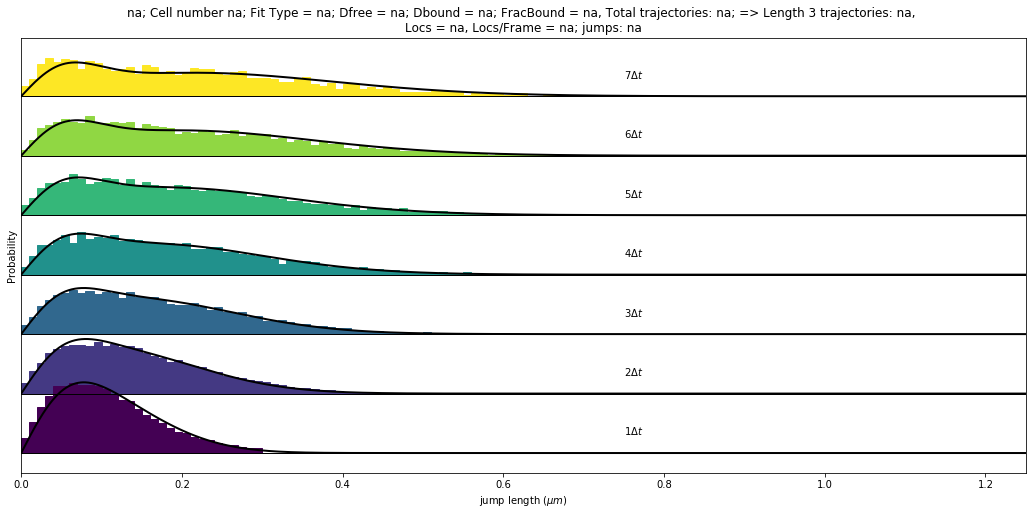

Number of frames: 1000.0, number of localizations: 22772
Computation of jump lengths performed in 1.58s
Fitting 2 states
Improved fit on iteration 1
Improved error is 2.5165568560269335e-06
Name        Value      Min      Max   Stderr
D_bound         0        0    0.005     None
D_free    0.05546     0.02      0.1     None
F_bound    0.2199        0        1     None
sigma     0.03708    0.005      0.1     None
None


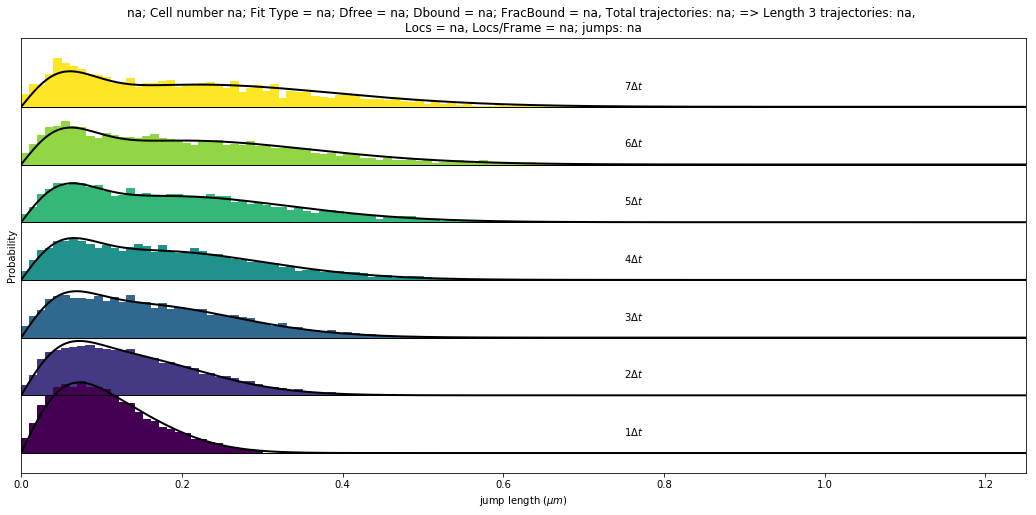

Number of frames: 1000.0, number of localizations: 17363
Computation of jump lengths performed in 1.46s
Fitting 2 states
Improved fit on iteration 1
Improved error is 3.0467201513531025e-06
Name        Value      Min      Max   Stderr
D_bound  6.939e-18        0    0.005     None
D_free    0.05471     0.02      0.1     None
F_bound    0.2364        0        1     None
sigma     0.03542    0.005      0.1     None
None


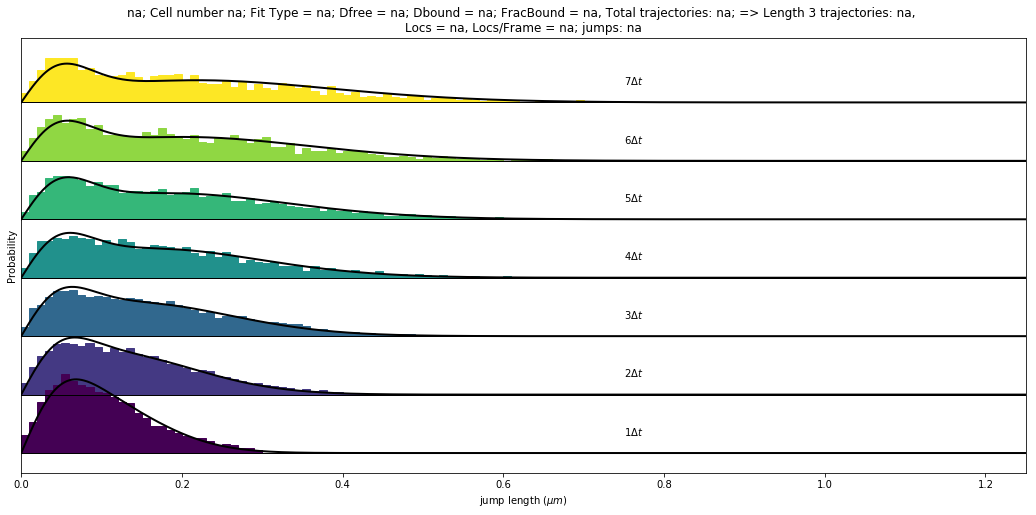

In [24]:
## Generate a dictionary of parameters
fit_params = dict(states=2,
                 iterations=1,
                 CDF=False,
                 CDF1 = True,
                 Frac_Bound = [0, 1],
                 D_Free = [0.02, 0.1],
                 D_Med = [0.005, 0.1],
                 D_Bound = [0.0, 0.005],
                 sigma = 0.02,
                 sigma_bound = [0.005, 0.1],
                 fit_sigma=True,
                 dT=0.06,
                 dZ=0.7,
                 a=0.15716,
                 b=0.20811,
                 useZcorr=False,
                 plot_hist=False,
                 plot_result=True) 


def my_fit(rep):
    
    cell_spt = readers.to_fastSPT(rep, from_json=False)
    fit_result = tools.auto_fit(cell_spt,
                                fit_params=fit_params)
    return fit_result

reps_fits = list(map(my_fit, reps))


In [28]:
#get stats
fit_stats = pd.DataFrame(columns=list(reps_fits[0].best_values.keys()) + ['chi2', 'num_tracks'])
fit_stats.index.name = 'Dataset'
for i, fit_result in enumerate(reps_fits):
    name = data_paths[i].split("\\")[-2]
    # name = f'rep {i+1}'
    fit_stats.loc[f'{name}'] = list(fit_result.best_values.values()) + [fit_result.chisqr, len(reps[i])]

fit_stats.loc['mean'] = fit_stats.mean(axis=0)
fit_stats.loc['std'] = fit_stats.std(axis=0)

#fit_stats.to_json(folder + '\stats.json')

fit_stats
#fit_stats.to_excel(path_oe + '.stats.xls')

,D_free,D_bound,F_bound,sigma,chi2,num_tracks
Dataset,,,,,,
01_60ms_561-405_temp_32_1,0.057471,8.326673e-18,0.204375,0.030208,0.003318,1309.000000
02_60ms_561-405_temp_32_1,0.055664,3.552714e-17,0.219256,0.027760,0.004613,801.000000
02_60ms_561-405_temp_32_2,0.051439,1.476606e-03,0.179348,0.032115,0.002188,2096.000000
03_60ms_561-405_temp_31_1,0.052225,1.207979e-04,0.148628,0.035211,0.001412,4893.000000
04_60ms_561-405_temp_31_1,0.056383,2.596971e-03,0.179737,0.036959,0.001793,3200.000000
05_60ms_561-405_temp_31_3,0.052594,8.269821e-04,0.208344,0.033499,0.001469,3602.000000
06_60ms_561-405_temp_31_1,0.052341,4.245763e-05,0.178491,0.037057,0.002405,2177.000000
07_60ms_561-405_temp_31_1,0.051691,2.560111e-04,0.263985,0.039697,0.006414,1405.000000
08_60ms_561-405_temp_31_1,0.049863,2.775558e-19,0.210829,0.031063,0.002885,2541.000000


In [26]:
# save stats

fit_stats.to_json(folder + '\stats.json')

In [97]:
# remove bad fits
stats_filtered = fit_stats[fit_stats.chi2 < 0.01]
stats_filtered.to_json(folder + '\stats_chi2_better_than_0.01.json')
stats_filtered

,D_free,D_bound,F_bound,sigma,chi2,num_tracks
"['FOV1', 'movie_Ard_trig_v1.0_exp_60ms_561_50W_30ms_405_12.5mW_0.8ms_1']",0.061961,3.581161e-04,0.283051,0.047220,0.004957,1910.000000
"['FOV5', 'movie_continuos_exp_60ms_561_50W_405_12.5mW_1']",0.100000,7.438494e-17,0.235892,0.054208,0.005529,16449.000000
"['FOV7', 'movie_continuos_exp_60ms_561_50W_405_12.5mW_1']",0.068401,1.004699e-03,0.290912,0.049450,0.001203,9115.000000
mean,0.078304,3.407038e-04,0.366257,0.046612,0.007740,7115.500000
std,0.014634,4.102898e-04,0.168127,0.006856,0.006861,6240.106349


In [55]:
import json

In [58]:
json.dump(fit_params, open(folder + '\params.json', 'x'))

In [16]:
pd.read_json(r"Z:/Andrey/fromGizem/2019-04-18-PBP2-tracks/PBP2OverExpforAndrey.mat.stats.json",)

,D_fast,D_med,D_bound,F_fast,F_bound,sigma,chi2
mean,0.036449,0.011052,1.067581e-04,0.547984,0.123352,0.019759,0.001334
rep 1,0.036826,0.010664,1.053494e-04,0.521843,0.128585,0.019831,0.001504
rep 2,0.041200,0.015000,2.149249e-04,0.467069,0.124263,0.020219,0.001203
rep 3,0.031321,0.007492,7.549517e-17,0.655040,0.117209,0.019227,0.001295
std,0.004042,0.003078,8.774840e-05,0.078933,0.004689,0.000408,0.000126
